<a href="https://colab.research.google.com/github/PravinMuraliDharan/Data_Science_Capstone_Project/blob/Master/Emotion_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Content

---

- [Packages](#1)
- [Data Preprocessing](#2)
  - [Importing and Loading Dataset](#2-1)
  - [Dataset Description](#2-2)
  - [Training Dataset Inspection](#2-3)
  - [Testing Dataset Inspection](#2-4)

<a name = '5'></a>
# <b> Packages

---
> Necessary Libraries for performing analysis and implementation of Emotion Classifier using Deep Learning


In [1]:
# Libraries for Data Manupulation
import os
import numpy as np
import pandas as pd
import seaborn as sns

# Libraries for Data Visualization
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Libraries for Data Preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img

# Libraries for Train Test Split
from sklearn.model_selection import train_test_split

# Libraries for Deep Learning
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.layers import Input
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense , Activation , Dropout ,Flatten

# Libraries for Normalizing
from keras.layers import BatchNormalization

# Libraries for Evaluating the model
from keras.optimizers import *
from keras import regularizers
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_accuracy

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

print('All libraries are imported Successfully :)')

All libraries are imported Successfully :)


<a name = '2'></a>
# <b> Data Preprocessing

---
> It involves preparing dataset such as Data Augumentation and Data Engineering.


<a name = '2-1'></a>
## <b> Importing and Loading Dataset

In [2]:
# Reading the dataset from drive
train_dir = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/2. Capstone Project/5.Deep Learning/FER-Datasets/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/2. Capstone Project/5.Deep Learning/FER-Datasets/test/'

In [3]:
# Function to read the dataset
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

In [4]:
# Loading the dataset
train_df = count_exp(train_dir, 'train')
test_df = count_exp(test_dir, 'test')

<a name='2-2'></a>
## <b> Dataset Description

---
> The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.
>
> The task is to categorize each face based on the emotion shown in the facial expression in to one of Seven categories.
> * 0	Happy
> * 1	Angry
> * 2	Surprise
> * 3	Sad
> * 4	Neutral
> * 5 Fear
> * 6 Disgust
>
> We define a simple CNN model and compare the predicted results with ge given labels.


<a name = '2-3'></a>
## <b> Training Dataset Inspection

In [5]:
# Looking into the training data
print(train_df)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171


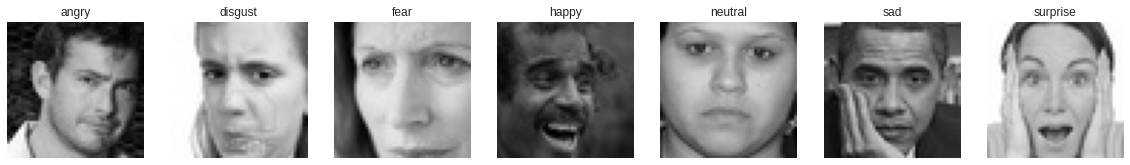

In [12]:
# Visualizing the train dataset
plt.figure(figsize=(20,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

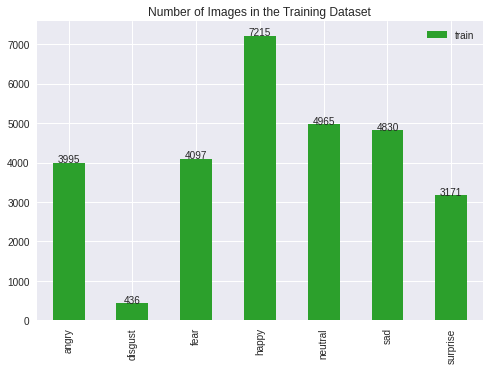

<Figure size 2160x864 with 0 Axes>

In [26]:
# Looking at the distribution of training dataset
ax = train_df.transpose().plot(kind='bar',color='tab:green')
plt.title('Number of Images in the Training Dataset', fontsize=12)
plt.figure(figsize=(30,12))
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")

<a name = '2-4'></a>
## <b> Testing Dataset Inspection

In [8]:
# Looking into the testing data
print(test_df)

      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


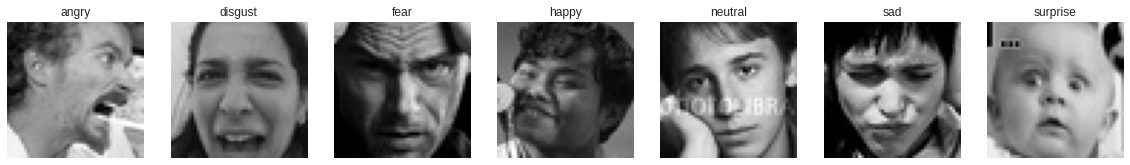

In [11]:
# Visualizing the test dataset
plt.figure(figsize=(20,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img((test_dir + expression +'/'+ os.listdir(test_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

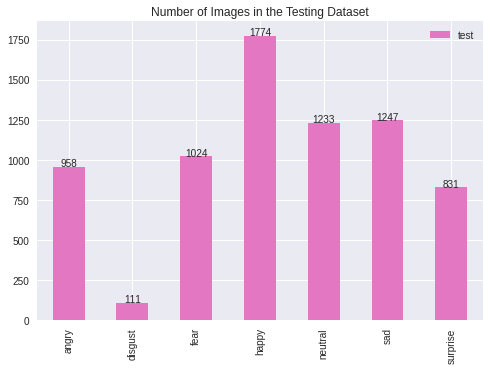

<Figure size 2160x864 with 0 Axes>

In [27]:
# Looking at the distribution of testing dataset
ax = test_df.transpose().plot(kind='bar',color='tab:pink')
plt.title('Number of Images in the Testing Dataset', fontsize=12)
plt.figure(figsize=(30,12))
for i in ax.patches:
    height = i.get_height()
    width = i.get_width()
    ax.text(i.get_x() + width/2, height + 1,height ,ha="center")